In [23]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [24]:
folder = Path("storage/synced")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["pretrain_mode"].replace(np.NaN, False, inplace=True)
df["window_time_stride"].replace(np.NaN, 1, inplace=True)
df["window_patt_stride"].replace(np.NaN, 1, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]

# filter out tcn
df = df[df["arch"] != "tcn"]

df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,df,cnn,SyntheticControl,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,768.0,768.0,19.070286,5977.978935,5997.049221,False,NaN,NaN,30.0
1,df,cnn,SyntheticControl,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,768.0,768.0,17.832657,6028.868102,6046.700758,False,NaN,NaN,50.0
2,df,cnn,SyntheticControl,0.25,120.0,128.0,False,10,1.0,1.0,...,200.0,768.0,768.0,17.808640,7155.362063,7173.170703,False,NaN,NaN,10.0
3,df,cnn,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,768.0,768.0,19.840980,7179.861632,7199.702612,False,NaN,NaN,70.0
4,df,cnn,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,96.0,96.0,768.0,17.506086,661.998978,679.505064,False,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,27.572046,11111.906313,11139.478359,True,NaN,NaN,70.0
11,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,18.857238,15301.487796,15320.345035,False,NaN,NaN,70.0
12,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,20.399303,18484.149174,18504.548477,False,NaN,NaN,70.0
13,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,768.0,768.0,21.944322,19017.388270,19039.332592,False,NaN,NaN,70.0


In [25]:
df[df["arch"] == "nn"][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,cv_rep
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,3.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,0.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,2.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,3.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,2.0
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,1.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,4.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,1.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,1.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,0.0


In [26]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["eq_wdw_length"] > 1]

0 duplicate entries removed


In [27]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
75,df,cnn,CBF,True,10,7.0,1.0,False,0.0
76,df,cnn,CBF,True,10,7.0,1.0,False,0.0
152,df,cnn,ECG200,True,10,7.0,1.0,False,0.0
153,df,cnn,ECG200,True,10,7.0,1.0,False,0.0
229,df,cnn,GunPoint,True,10,7.0,1.0,False,0.0
230,df,cnn,GunPoint,True,10,7.0,1.0,False,0.0
231,df,cnn,Plane,True,10,7.0,1.0,False,0.0
232,df,cnn,Plane,True,10,7.0,1.0,False,0.0
308,df,cnn,SyntheticControl,True,10,7.0,1.0,False,0.0
309,df,cnn,SyntheticControl,True,10,7.0,1.0,False,0.0


In [28]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.112788,8653.998583,8681.111371,NaN,NaN,10.0
1,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.403898,8340.298294,8367.702192,NaN,NaN,10.0
2,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.498332,11044.660054,11072.158387,NaN,NaN,10.0
3,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,16.885669,7691.723888,7708.609557,NaN,NaN,10.0
4,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,28.012160,11290.911211,11318.923371,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,ts,rnn,SyntheticControl,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,768.0,768.0,18.593641,144872.345425,144890.939066,NaN,NaN,70.0
1490,ts,rnn,SyntheticControl,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,768.0,768.0,19.727160,8776.190680,8795.917840,NaN,NaN,70.0
1491,ts,rnn,SyntheticControl,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,768.0,768.0,20.614156,9008.785551,9029.399707,NaN,NaN,70.0
1492,ts,rnn,SyntheticControl,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,768.0,768.0,24.101081,9538.510776,9562.611857,NaN,NaN,70.0


In [29]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [30]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

nn_data = data[data["arch"] == "nn"]
data = data[~data["arch"].isin(["nn"])]
#data = data[data["dataset"] == "CBF"]


In [31]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc  \
dataset          mode arch eq_wdw_length                                   
CBF              df   cnn  10.0           0.529220  0.529220    0.257070   
                           30.0           0.632610  0.632610    0.319524   
                           50.0           0.694728  0.694728    0.364234   
                           70.0           0.705981  0.705981    0.395527   
                      res  10.0           0.446583  0.446583    0.248451   
...                                            ...       ...         ...   
SyntheticControl ts   res  70.0           0.369654  0.369654    0.293398   
                      rnn  10.0           0.413179  0.413179    0.315698   
                           30.0           0.450564  0.450564    0.312886   
                           50.0           0.443334  0.443334    0.321600   
                           70.0           0.425585  0.425585    0.308314   

                                           val_acc    val_f1  val_auroc  
dataset          mode arch eq_wdw_length                                 
CBF              df   cnn  10.0           0.569719  0.569719   0.311498  
                           30.0           0.652394  0.652394   0.330366  
                           50.0           0.709768  0.709768   0.360027  
                           70.0           0.721597  0.721597   0.394134  
                      res  10.0           0.485161  0.485161   0.300579  
...                                            ...       ...        ...  
SyntheticControl ts   res  70.0           0.379673  0.379673   0.326805  
                      rnn  10.0           0.407554  0.407554   0.341629  
                           30.0           0.443033  0.443033   0.333925  
                           50.0           0.431807  0.431807   0.345785  
                           70.0           0.406573  0.406573   0.341215  

[112 rows x 6 columns]

In [32]:
nn_data.groupby(["dataset", "mode", "arch"])[cols].mean()

,,,test_acc,test_f1,test_auroc,val_acc,val_f1,val_auroc
dataset,mode,arch,,,,,,
ECG200,ts,nn,0.373543,0.373543,NaN,NaN,NaN,NaN
GunPoint,ts,nn,0.510791,0.510791,NaN,NaN,NaN,NaN
SyntheticControl,ts,nn,0.270676,0.270676,NaN,NaN,NaN,NaN


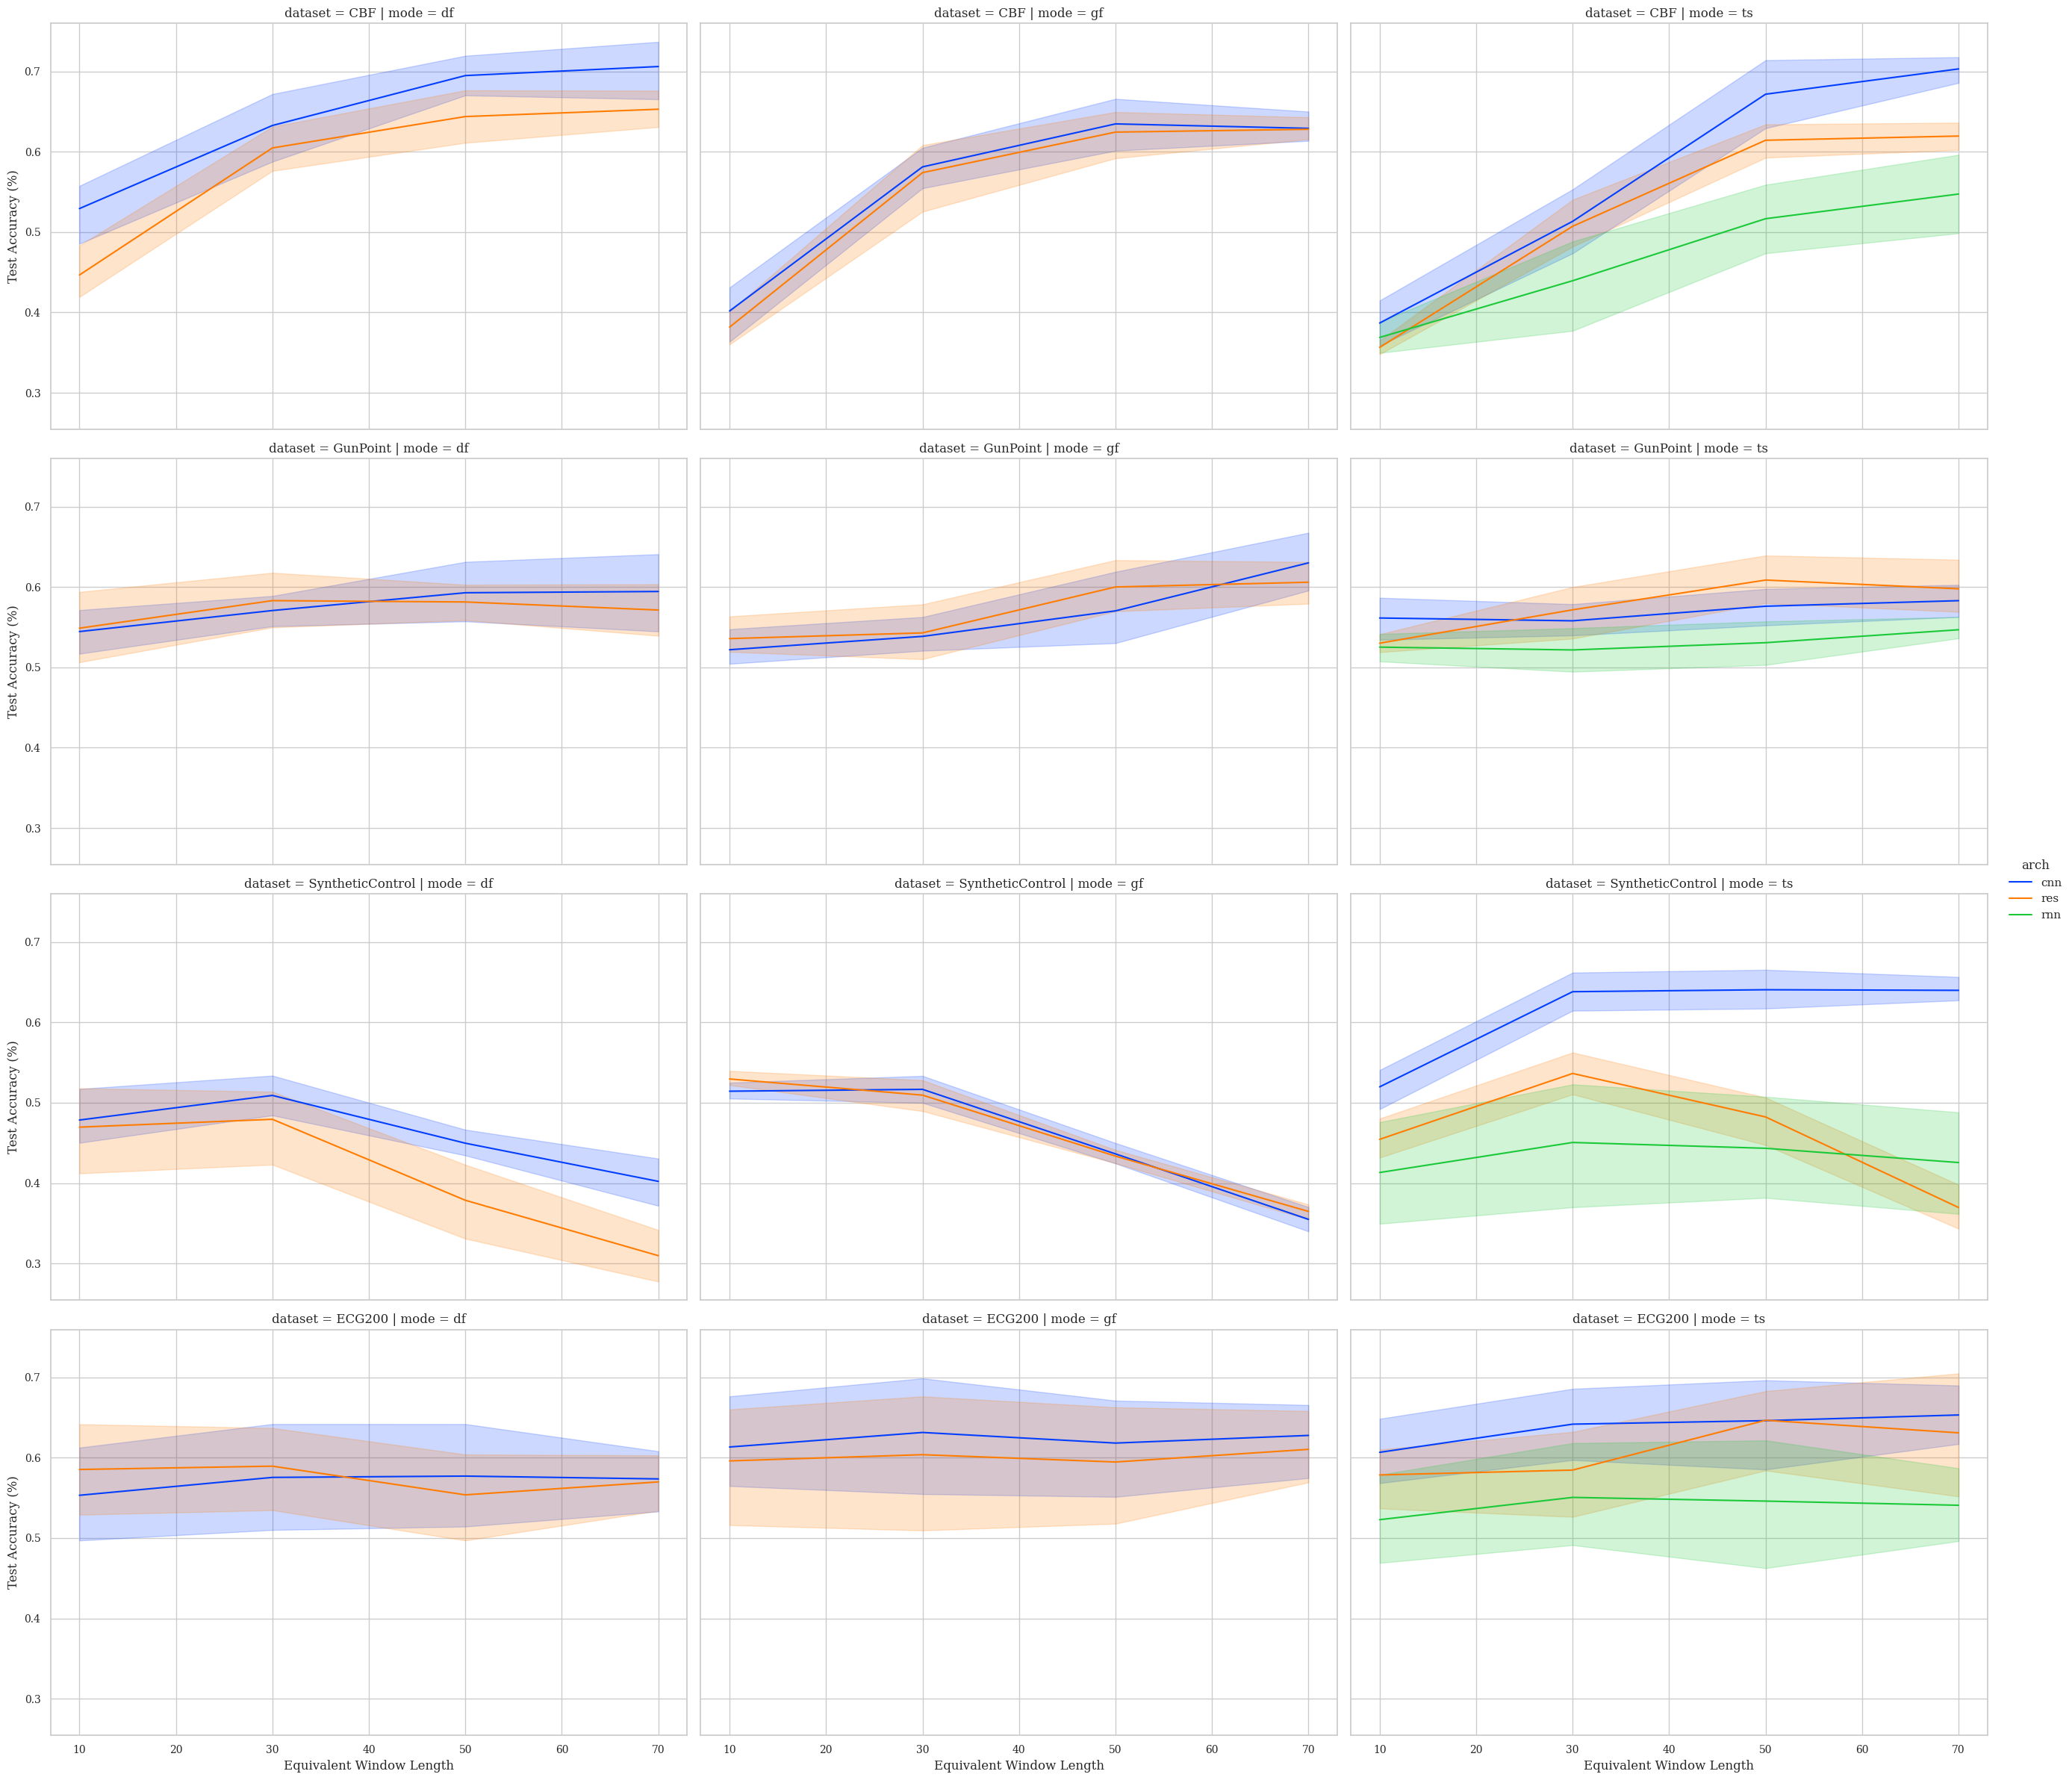

In [33]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Section 5.2: Pattern Stride Effects

In [34]:
# data = df[df["pretrain_mode"] == False].copy()

# data = data[data['train_exc_limit'] == 32]
# data = data[data["window_time_stride"] == 7]
# data = data[data["pretrained"] == False]

# data = data[data["dataset"] == "CBF"]

In [35]:
# # Generate a table
# data.groupby(["dataset", "mode", "arch", "window_patt_stride"])[cols].mean()

In [36]:
# # Generate a plot
# data["Method"] =  data["arch"] + "_" + data["mode"]
# data.sort_values(["Method"], inplace=True)

# sns.set_theme()
# sns.set_style("whitegrid")
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='small')
# plt.rc('ytick', labelsize='small')

# g = sns.relplot(data=data, x="window_patt_stride", y="val_acc", hue='Method', kind="line", palette="bright",
#                 height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

# g.set_ylabels("Test Accuracy (%)")
# g.set_xlabels("Window Pattern Stride");

# g.savefig("figures/pattern_stride_acc.pdf", bbox_inches='tight')

In [37]:
# # Generate a plot

# sns.set_theme()
# sns.set_style("whitegrid")
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='small')
# plt.rc('ytick', labelsize='small')

# data["Time"] = data["time_train"]/60/60

# g = sns.relplot(data=data, x="window_patt_stride", y='Time', hue='Method', kind="line", palette="bright",
#                 height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

# g.set_ylabels("Training Time (Hours)")
# g.set_xlabels("Window Pattern Stride");

# g.savefig("figures/pattern_stride_time.pdf", bbox_inches='tight')

# Section 5.3: Self-Supervised Pretrain Effects

In [38]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

# data = data[data["dataset"] == "CBF"]
# data = data[data["mode"] == "df"]
data = data[data["arch"].isin(["cnn", "res"])]

In [39]:
data[data["mode"] == "df"].groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
CBF              df   cnn  False      False         4.0              0.484933   
                                                    8.0              0.580093   
                                                    16.0             0.654577   
                                                    32.0             0.705981   
                           True       False         4.0              0.584159   
...                                                                       ...   
SyntheticControl df   res  True       False         32.0             0.462134   
                                      True          4.0              0.254772   
                                                    8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   

                                                                      test_f1  \
dataset          mode arch pretrained stride_series train_exc_limit             
CBF              df   cnn  False      False         4.0              0.484933   
                                                    8.0              0.580093   
                                                    16.0             0.654577   
                                                    32.0             0.705981   
                           True       False         4.0              0.584159   
...                                                                       ...   
SyntheticControl df   res  True       False         32.0             0.462134   
                                      True          4.0              0.254772   
                                                    8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   

                                                                     test_auroc  \
dataset          mode arch pretrained stride_series train_exc_limit               
CBF              df   cnn  False      False         4.0                0.331722   
                                                    8.0                0.349776   
                                                    16.0               0.374026   
                                                    32.0               0.395527   
                           True       False         4.0                0.356628   
...                                                                         ...   
SyntheticControl df   res  True       False         32.0               0.310401   
                                      True          4.0                0.253622   
                                                    8.0                0.277317   
                                                    16.0               0.301433   
                                                    32.0               0.315165   

                                                                      val_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
CBF              df   cnn  False      False         4.0              0.580369   
                                                    8.0              0.586902   
                                                    16.0             0.702840   
                                                    32.0             0.721597   
                           True       False         4.0              0.732279   
...                                                                       ...   
SyntheticControl df   res  True       False         32.0             0.429612   
                                      True          4.0              0.369480   
                                                    8.0              0.

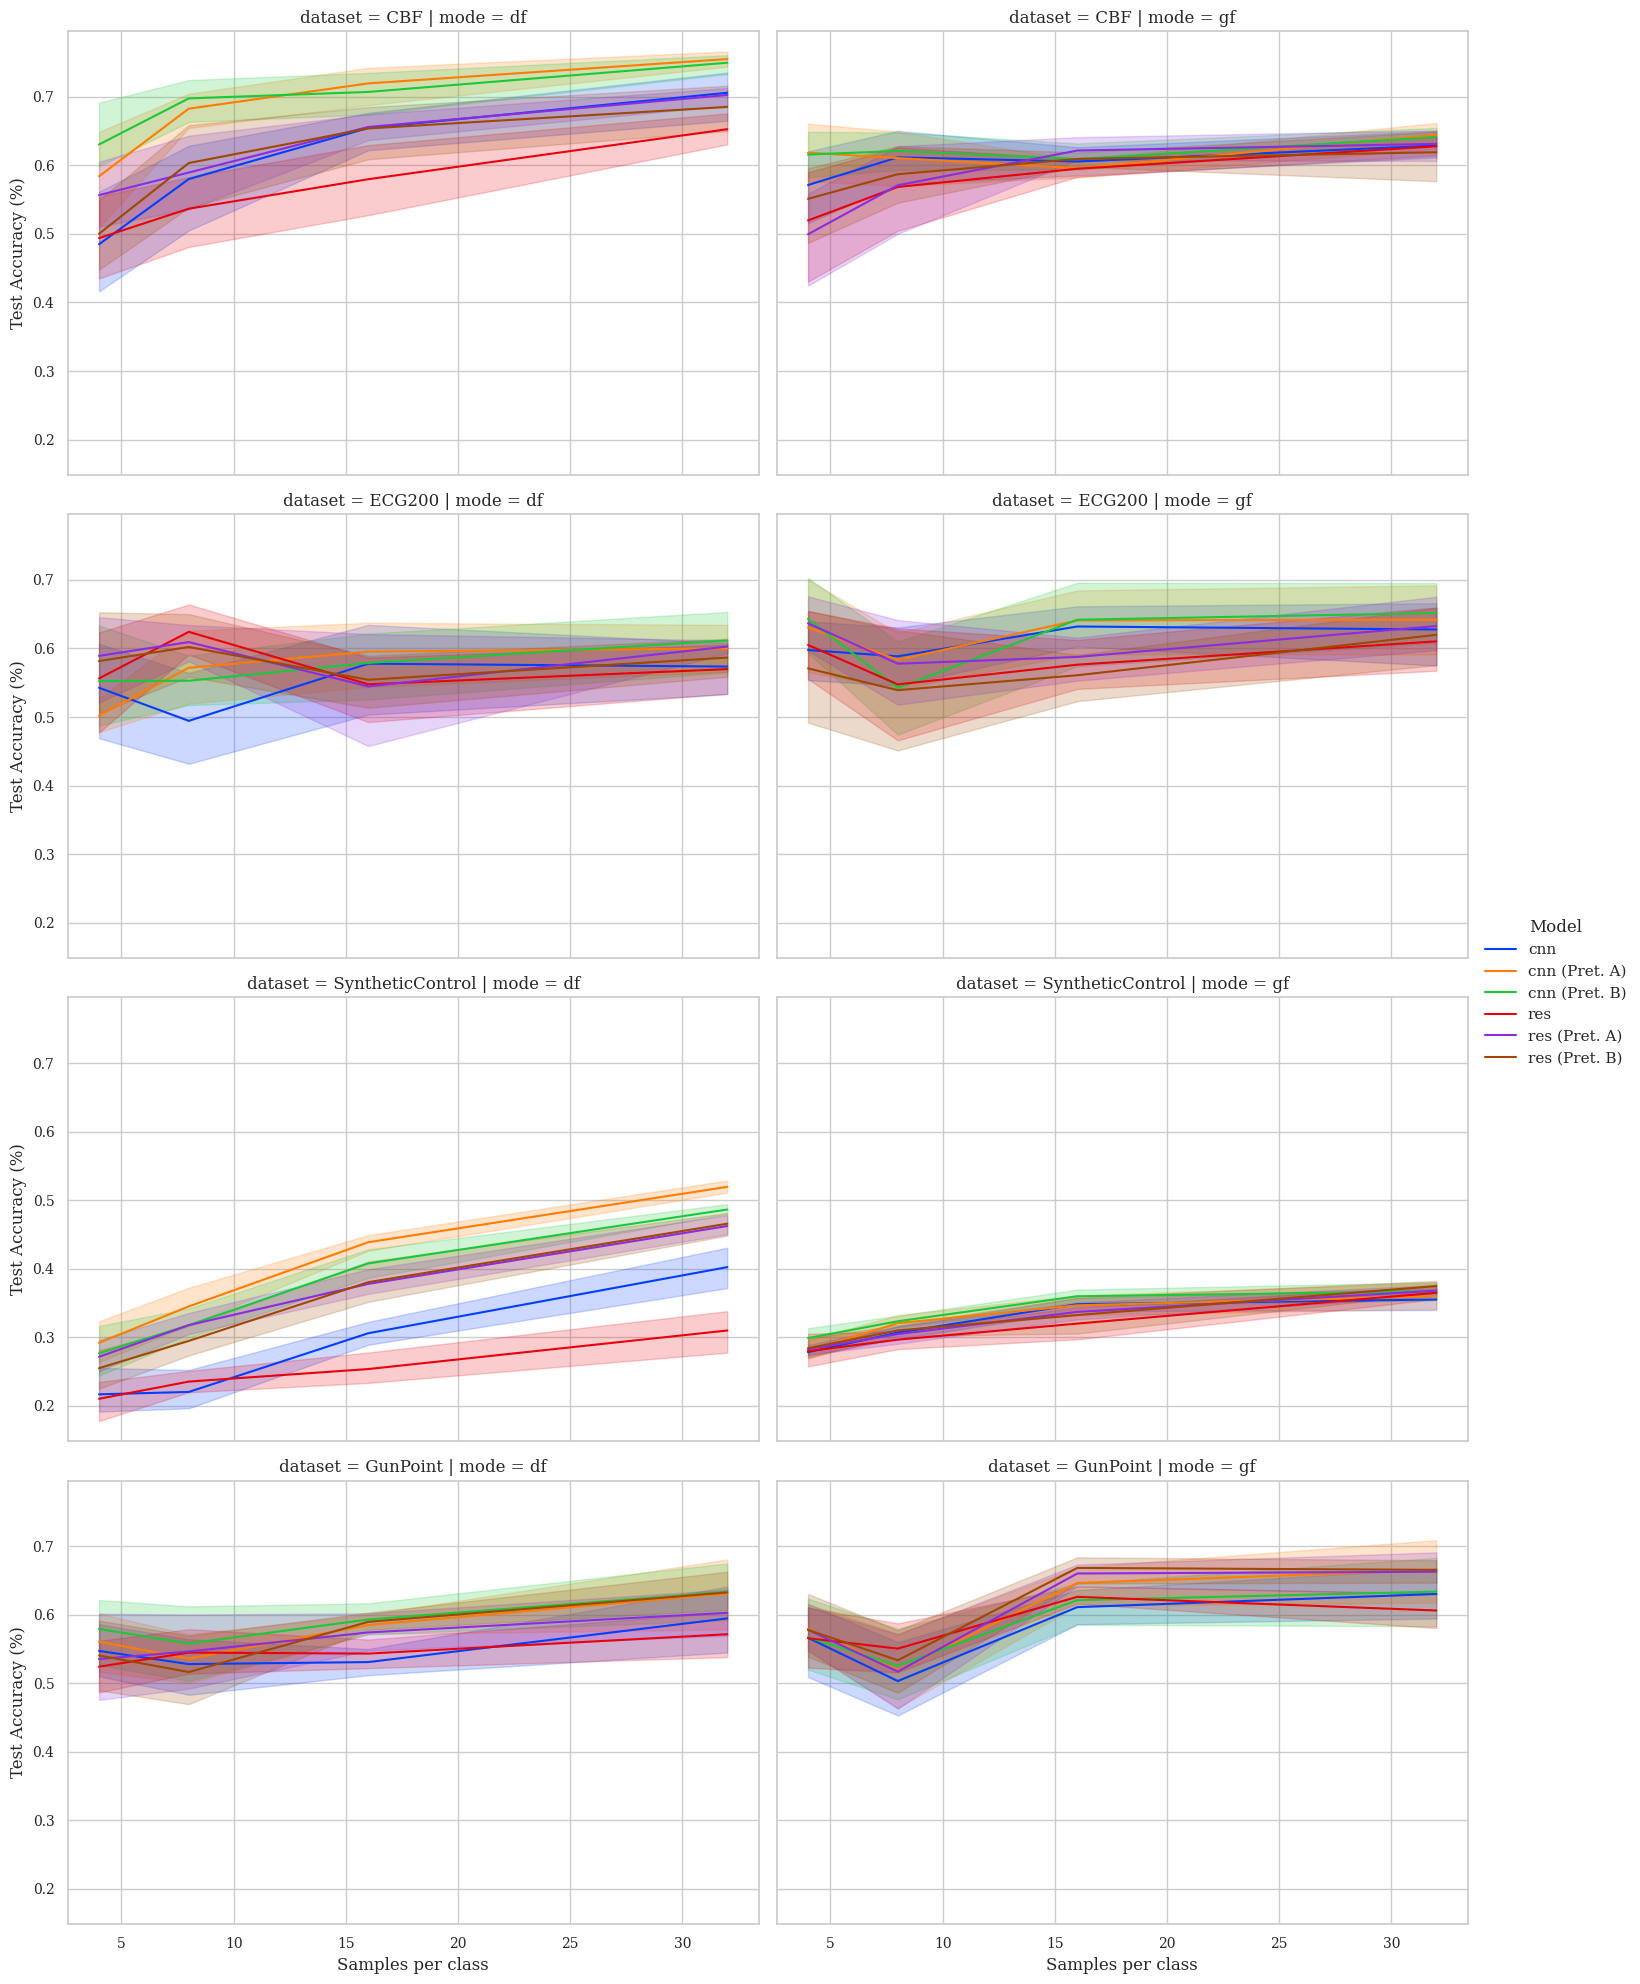

In [40]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"cnn A)": "cnn", "res A)": "res", "tcn A)": "tcn"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright", col="mode", row="dataset", 
                height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')

# heatmap showing percent change over no pretraied model

In [41]:
dfg = data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean().reset_index()

metric = "test_acc"

# archs = {arch: i for i, arch in enumerate(dfg["arch"].sort_values().unique())}
# dsets = {dset: i for i, dset in enumerate(dfg["dataset"].sort_values().unique())}
# modes = {mode: i for i, mode in enumerate(dfg["mode"].sort_values().unique())}
# samps = {samp: i for i, samp in enumerate(dfg["train_exc_limit"].sort_values().unique())}
# prets = {"A": 0, "B": 1}

dfd = pd.DataFrame(columns=["arch", "mode", "dataset", "train_exc_limit", "pret", metric])

for (dset, mode, arch, nsamp), g in dfg.groupby(["dataset", "mode", "arch", 'train_exc_limit']):
    
    g: pd.DataFrame

    if len(g) == 3:

        def_val = g[metric].iloc[0]
        pa_val = g[metric].iloc[1]
        pb_val = g[metric].iloc[2]

        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "A", (pa_val - def_val)*100]
        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "B", (pb_val - def_val)*100]
        
    else: 
        continue

dfd["arch_pret"] = dfd["arch"] + "_" + dfd["pret"]
dfd.sort_values(["arch_pret", "dataset", "train_exc_limit"], inplace=True)

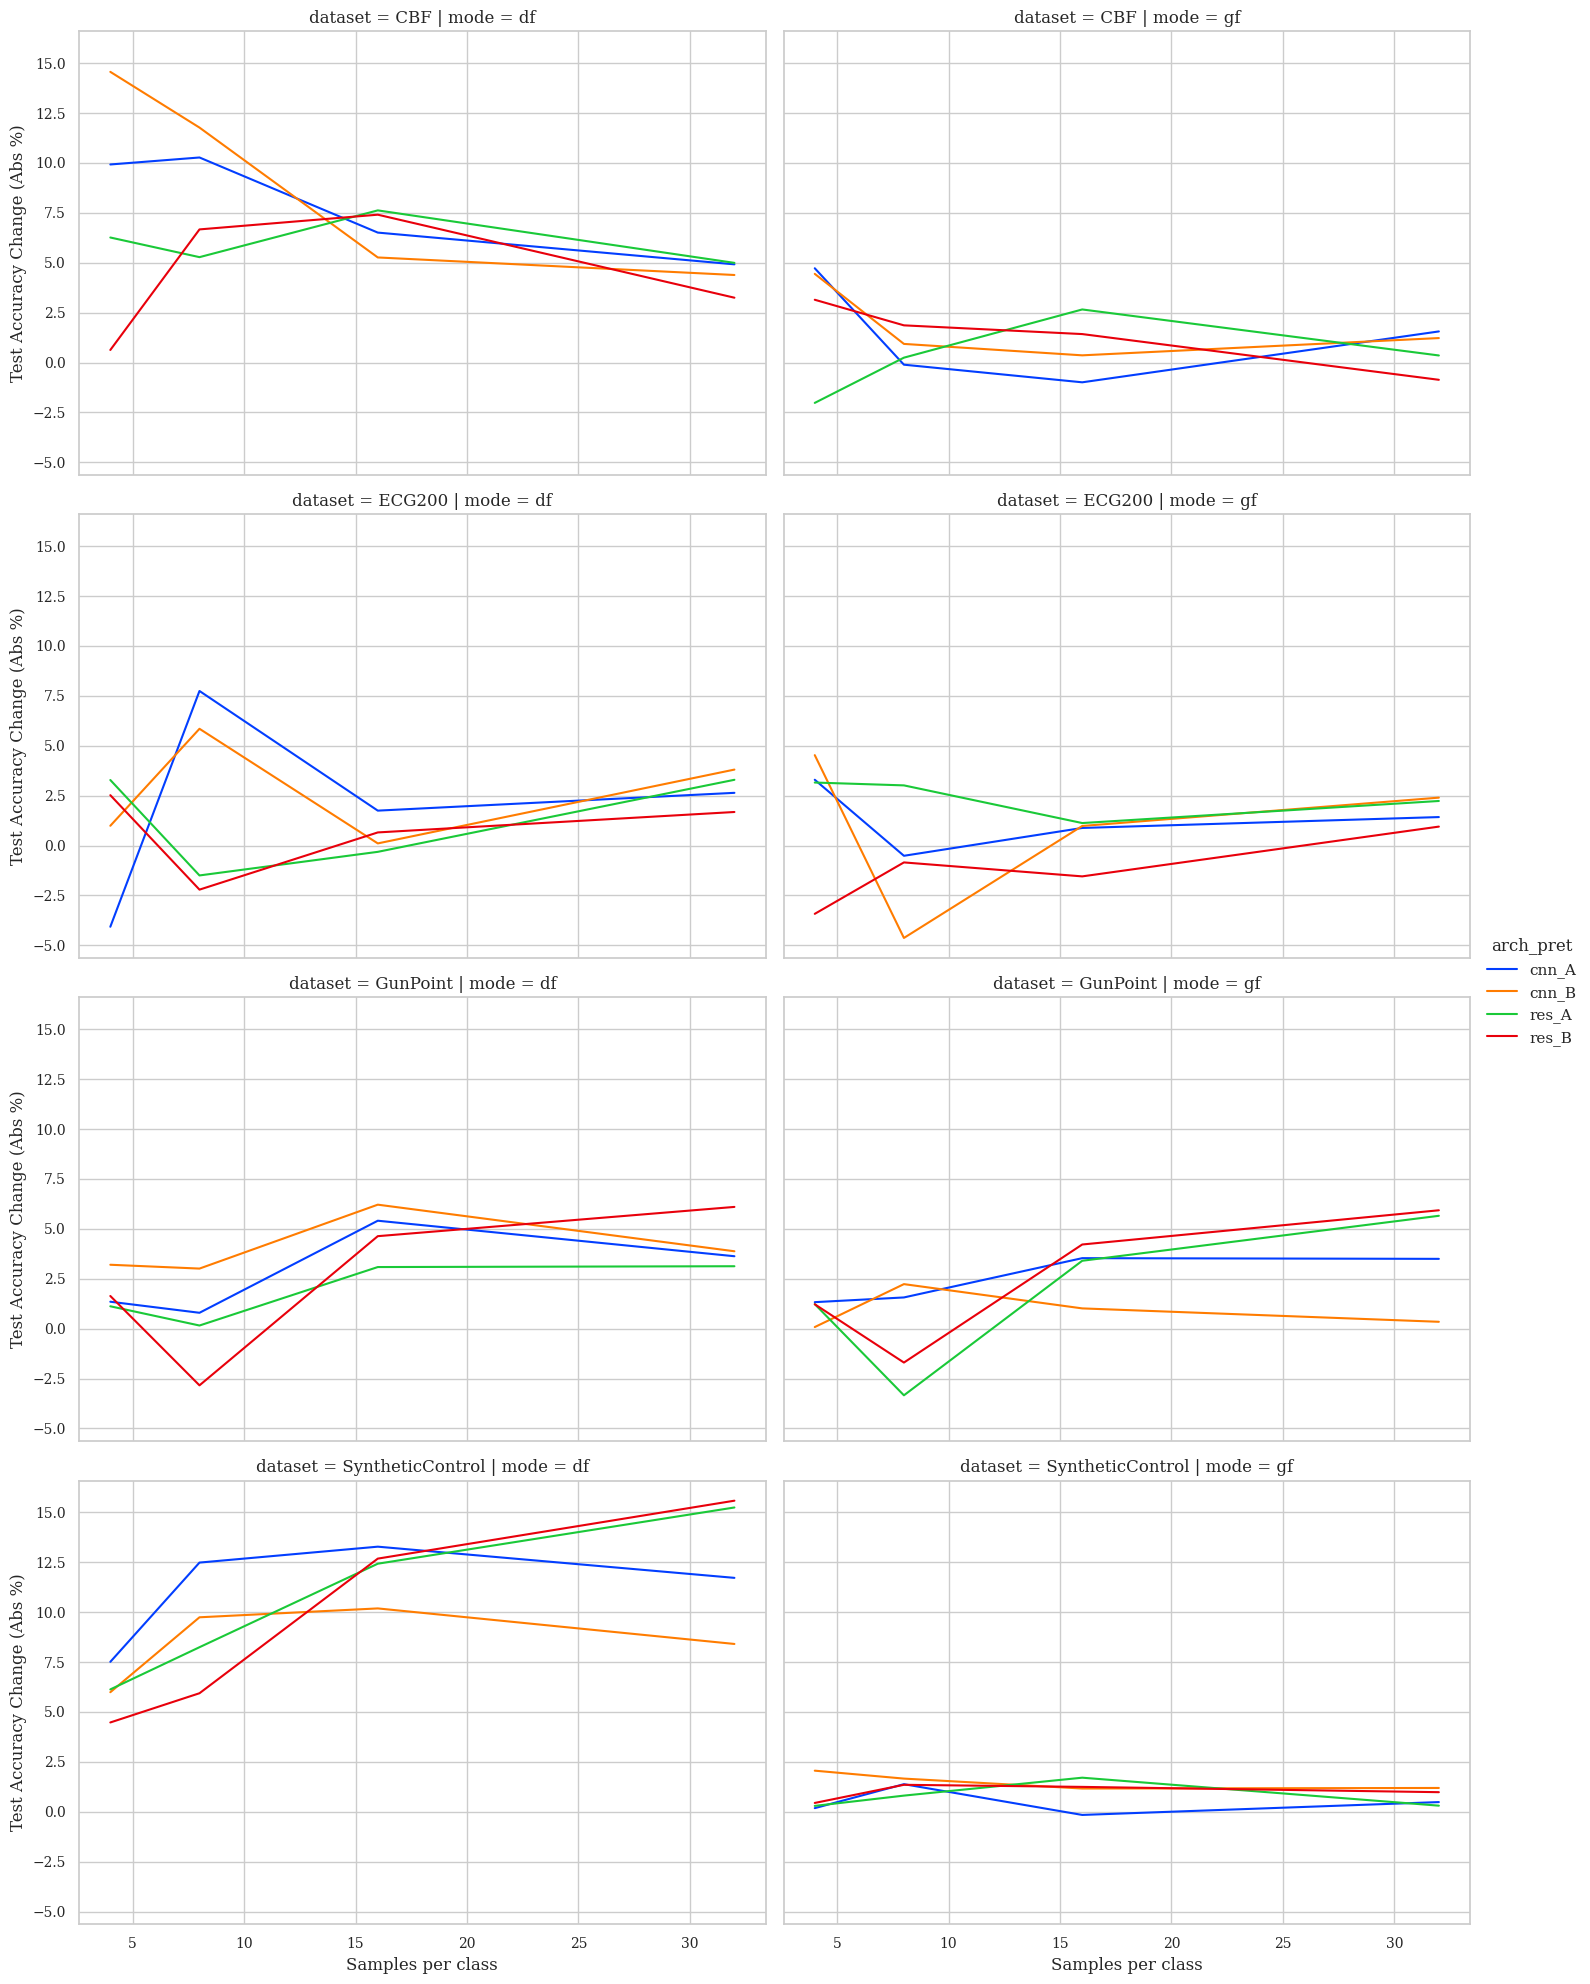

In [42]:
g = sns.relplot(data=dfd, x="train_exc_limit", y=metric, hue='arch_pret', kind="line", palette="bright", col="mode", row="dataset", 
            height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy Change (Abs %)")
g.set_xlabels("Samples per class");

# DF vs GF figure

In [43]:
from s3ts.data.acquisition import download_dataset
from s3ts.data.setup import train_test_splits
from s3ts.data.setup import setup_train_dm 
from pathlib import Path

# dataset settings
dataset         = "CBF"
storage_dir     = Path("storage")
cv_rep          = 0
exc             = 32
random_state    = 0
rho_dfs         = 0.1

X, Y, medoids, medoid_idx = download_dataset(dataset=dataset, storage_dir=storage_dir)
for j, (train_idx, test_idx) in enumerate(train_test_splits(X, Y, exc=exc, nreps=cv_rep+1, random_state=random_state)):
            if j == cv_rep:
                break

# sts settings
train_strat_size = 2
train_event_mult = 4
test_sts_length = 200
train_event_limit = exc
batch_size = 128

dm_df = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="df", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

dm_gf = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="gf", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

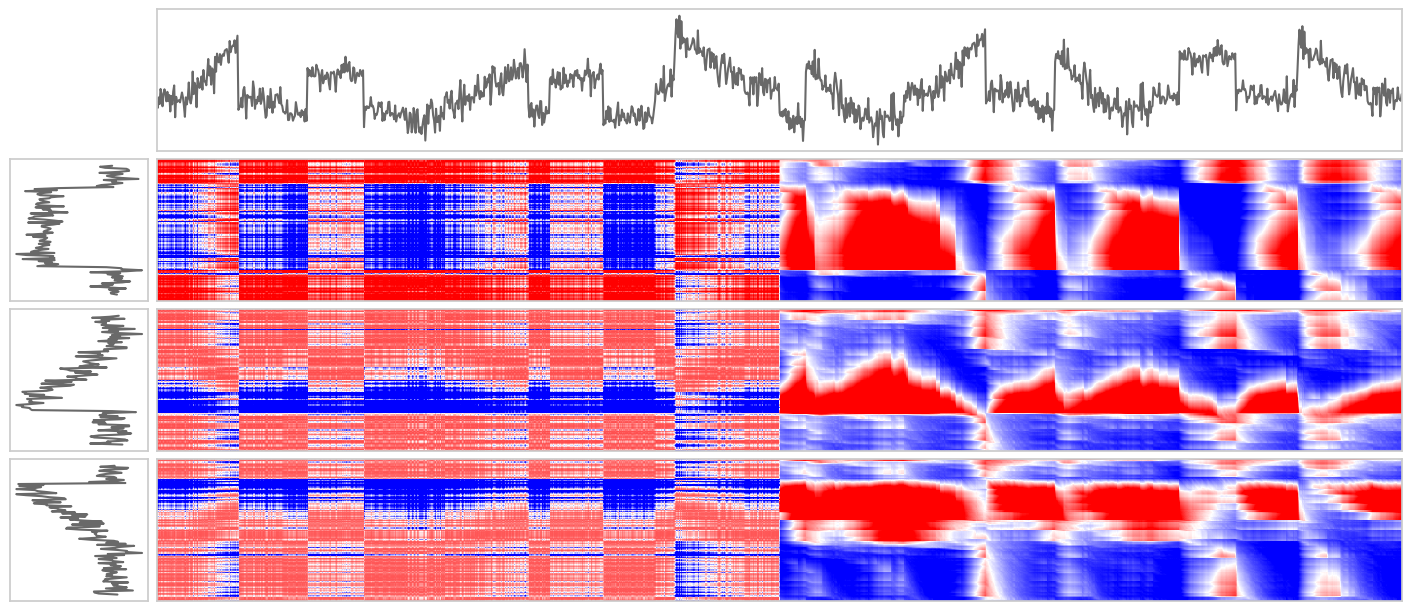

In [44]:


n_frames = 10 # must be even
cmaps = ["seismic", "seismic"]
n_patterns = dm_df.n_patterns
sts_range = (0, dm_df.l_events*n_frames)

patts = dm_df.patterns.numpy()
TS = dm_df.STS_train[sts_range[0]:sts_range[1]]
DF = dm_df.DM_train[:,:,sts_range[0]:sts_range[1]]
GF = dm_gf.DM_train[:,:,sts_range[0]:sts_range[1]]

fig = plt.figure(figsize=(14, 6), dpi=100, layout="constrained")
gs = fig.add_gridspec(nrows=n_patterns+1, ncols=2,
        hspace=0, height_ratios=None,
        wspace=0, width_ratios=[0.1, 0.9])


vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]), dm_df.l_events) == 0)[0]
sts_ax = fig.add_subplot(gs[0,1:])
sts_ax.plot(np.arange(sts_range[0], sts_range[1]), TS, color="dimgray")
sts_ax.set_xlim(sts_range[0], sts_range[1]-1)
sts_ax.set_xticklabels([]), sts_ax.set_yticklabels([])
sts_ax.set_xticks([]), sts_ax.set_yticks([])
# [sts_ax.axvline(x + sts_range[0], color="dimgray", linewidth=0.5) for x in vlines]
sts_ax.grid(True)

for p in range(n_patterns):

        # patt plot
        patt_ax = fig.add_subplot(gs[p+1,0])
        patt_ax.plot(patts[p,::-1], np.arange(len(patts[0])), color="dimgray")
        patt_ax.set_yticklabels([]), patt_ax.set_xticklabels([])
        patt_ax.set_yticks([]), patt_ax.set_xticks([])
        patt_ax.invert_xaxis(), patt_ax.grid(True)

        # image plot
        im_ax = fig.add_subplot(gs[p+1,1])     
        gf = GF[p,:,sts_range[0]:sts_range[1]-(sts_range[1]-sts_range[0])//2]   
        df = DF[p,:,sts_range[1]-(sts_range[1]-sts_range[0])//2:sts_range[1]]
        gf = 2*(gf-gf.mean())/gf.std()
        df = 2*(df-df.mean())/df.std()
        im = np.concatenate([gf, df], axis=1)
        im_ax.imshow(im, aspect="auto", cmap="bwr", vmin=-2, vmax=2)
        im_ax.set_yticklabels([]), im_ax.set_xticklabels([])
        im_ax.set_xticks([]), im_ax.set_yticks([])
        
        #[im_ax.axvline(x, color="white") for x in vlines]

        # # df plot
        # df_ax = fig.add_subplot(gs[p+1,1])        
        # df_im = DF[p,:,sts_range[0]:sts_range[1]-(sts_range[1]-sts_range[0])//2]
        # df_ax.imshow(df_im, aspect="auto")#, cmap=cmaps[0])
        # df_ax.set_yticklabels([]), df_ax.set_xticklabels([])
        # df_ax.set_xticks([]), df_ax.set_yticks([])
        # df_vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]-(sts_range[1]-sts_range[0])//2), dm_df.l_events) == 0)[0]
        # [df_ax.axvline(x, color="dimgray") for x in df_vlines]

        # # gf plot
        # gf_ax = fig.add_subplot(gs[p+1,2])
        # gf_im = GF[p,:,sts_range[1]-(sts_range[1]-sts_range[0])//2:sts_range[1]]
        # gf_ax.imshow(gf_im, aspect="auto")#, cmap=cmaps[1])
        # gf_ax.set_yticklabels([]), gf_ax.set_xticklabels([])
        # gf_ax.set_xticks([]), gf_ax.set_yticks([])
        # gf_vlines = np.where(np.mod(np.arange(sts_range[1]-(sts_range[1]-sts_range[0])//2, sts_range[1]), dm_df.l_events) == 0)[0]
        # [gf_ax.axvline(x, color="dimgray") for x in gf_vlines]

plt.savefig("figures/df_gf_CBF.pdf", dpi=300, bbox_inches="tight")        
